# Linear Regression Analysis on Advertising Dataset

## Problem Statement

To give a piece of brief information about the advertising dataset this data contains of 200 rows and 4 columns which contains the data of money spent for advertising through the different platforms like TV, Radio, Newspaper and the sales.

## Importing the Necessary Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
%matplotlib inline

In [2]:
advertising_dataset=pd.read_csv("advertising.csv")

In [3]:
advertising_dataset.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
advertising_dataset.shape
print(f"the dataset consist of {advertising_dataset.shape[0]} rows and {advertising_dataset.shape[1]} columns")

the dataset consist of 200 rows and 4 columns


In [5]:
advertising_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
#checking for the null values in the dataset
advertising_dataset.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [7]:
advertising_dataset.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

Text(0.5, 1.0, 'box plot of TV')

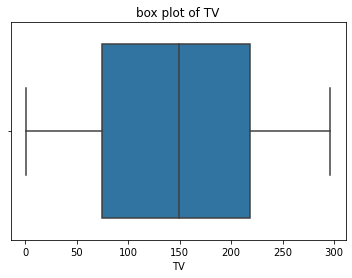

In [8]:
# checking for the outliers in the dataset
sns.boxplot(x=advertising_dataset["TV"]).set_title("box plot of TV")

Text(0.5, 1.0, 'box plot of Radio')

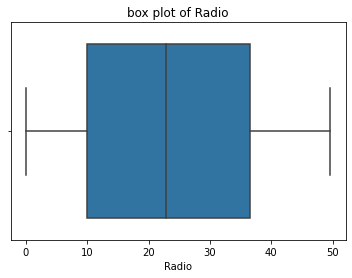

In [9]:
sns.boxplot(x=advertising_dataset["Radio"]).set_title("box plot of Radio")

Text(0.5, 1.0, 'box plot of Newspaper')

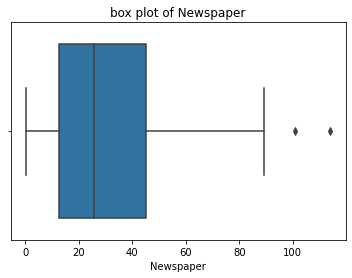

In [10]:
sns.boxplot(x=advertising_dataset["Newspaper"]).set_title("box plot of Newspaper")

In [11]:
#from the box plot we can notice that there are some outliers in the newspaper.

In [12]:
#outlier removal
def outlier_removal(advertising_df,i):
    q3=advertising_df[f'{i}'].quantile(.75)
    q1=advertising_df[f'{i}'].quantile(.25)
    iqr=q3-q1
    low_lim=q1-1.5*iqr
    upper_lim=q3+1.5*iqr
    advertising_df=advertising_df[(advertising_df[f'{i}']>=low_lim) & (advertising_df[f'{i}']<=upper_lim)]
    return advertising_df
columns=advertising_dataset.columns
for i in columns:
    advertising_dataset=outlier_removal(advertising_dataset,i)
    
    

In [13]:
advertising_dataset.shape
print(f"after removing the outliers, the dataset consist of {advertising_dataset.shape[0]} rows and {advertising_dataset.shape[1]} columns")

after removing the outliers, the dataset consist of 198 rows and 4 columns


In [14]:
print("the information about the dataset")
print("\n")
advertising_dataset.info()

the information about the dataset


<class 'pandas.core.frame.DataFrame'>
Int64Index: 198 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         198 non-null    float64
 1   Radio      198 non-null    float64
 2   Newspaper  198 non-null    float64
 3   Sales      198 non-null    float64
dtypes: float64(4)
memory usage: 7.7 KB


In [15]:
print("\n the descriptive statistics of the dataset: \n")
advertising_dataset.describe()


 the descriptive statistics of the dataset: 



,TV,Radio,Newspaper,Sales
count,198.000000,198.000000,198.000000,198.000000
mean,146.688384,23.130808,29.777273,15.100000
std,85.443221,14.862111,20.446303,5.271184
min,0.700000,0.000000,0.300000,1.600000
25%,74.800000,9.925000,12.650000,11.000000
50%,149.750000,22.400000,25.600000,16.000000
75%,218.475000,36.325000,44.050000,18.975000
max,293.600000,49.600000,89.400000,27.000000


In [16]:
advertising_dataset.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.051978,0.049771,0.899974
Radio,0.051978,1.000000,0.346364,0.348566
Newspaper,0.049771,0.346364,1.000000,0.151764
Sales,0.899974,0.348566,0.151764,1.000000


<AxesSubplot:>

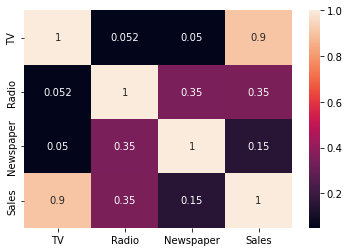

In [17]:
sns.heatmap(advertising_dataset.corr(),annot=True)

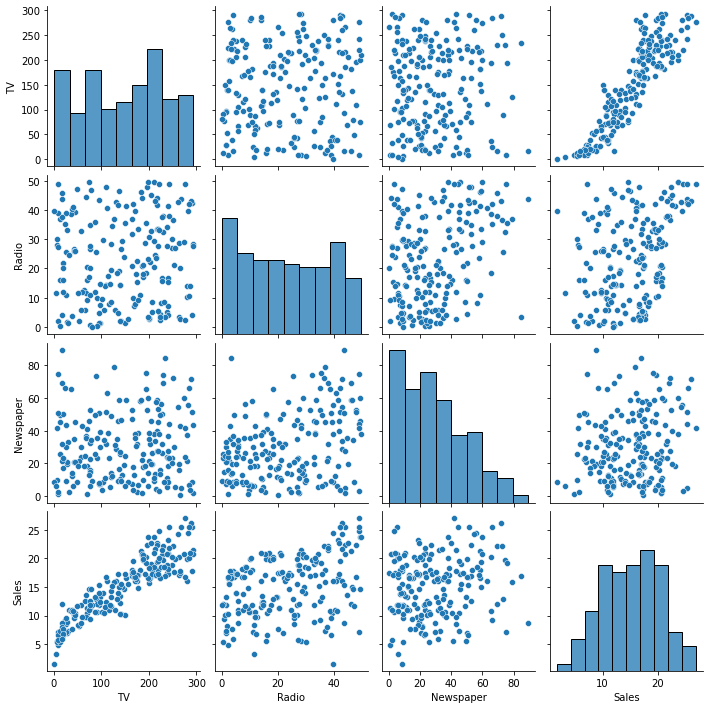

In [18]:
sns.pairplot(advertising_dataset)

In [19]:
#from the heat map we can notice that their is a positive correlation between newspaper, radio and tv with Sales.

# we can notice that their is a high positive correlation between tv and sales

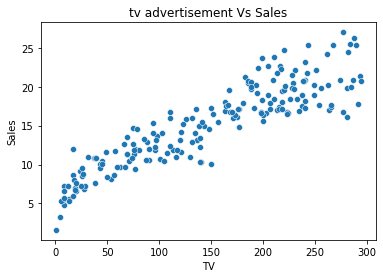

In [20]:
sns.scatterplot(data=advertising_dataset,x="TV",y="Sales").set_title("tv advertisement Vs Sales");

<AxesSubplot:xlabel='TV', ylabel='Sales'>

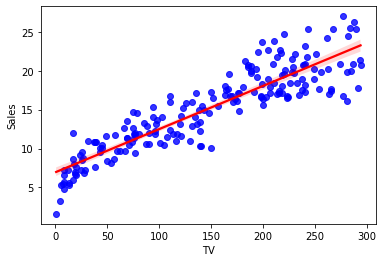

In [21]:
sns.regplot(data=advertising_dataset,x="TV",y="Sales",scatter_kws={"color": "blue"}, line_kws={"color": "red"})

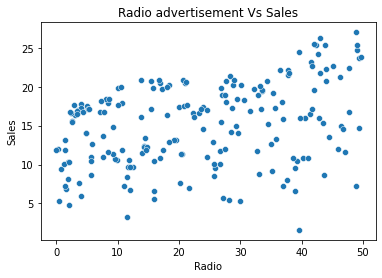

In [22]:
sns.scatterplot(data=advertising_dataset,x="Radio",y="Sales").set_title("Radio advertisement Vs Sales");

<AxesSubplot:xlabel='Radio', ylabel='Sales'>

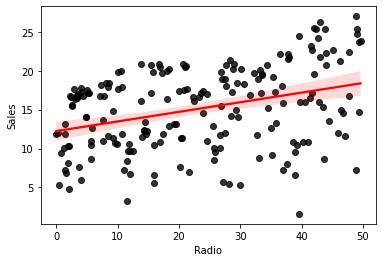

In [23]:
sns.regplot(data=advertising_dataset,x="Radio",y="Sales",scatter_kws={"color": "black"}, line_kws={"color": "red"})

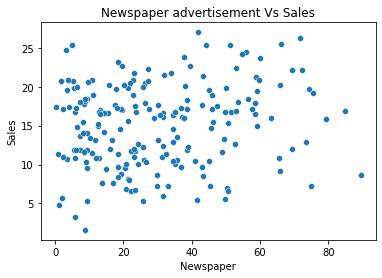

In [24]:
sns.scatterplot(data=advertising_dataset,x="Newspaper",y="Sales").set_title("Newspaper advertisement Vs Sales");

<AxesSubplot:xlabel='Newspaper', ylabel='Sales'>

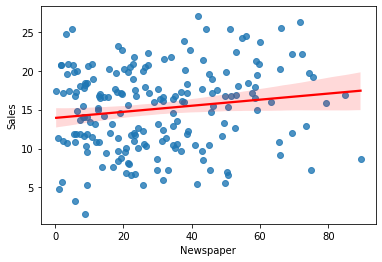

In [25]:
sns.regplot(data=advertising_dataset,x="Newspaper",y="Sales", line_kws={"color": "red"})

In [26]:
x=advertising_dataset.iloc[:,:-1]
y=advertising_dataset.iloc[:,-1]

In [27]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=72)

In [28]:
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [29]:
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

In [30]:
y_pred

array([21.32440365,  8.72969249, 17.30036491, 21.283623  ,  6.40508261,
        9.53227857, 10.69157271,  9.71156646, 15.94062391,  7.86083081,
       18.90512378,  9.41245777, 13.832369  ,  9.94158073, 13.75316456,
       20.99730507,  5.50252837, 20.73010766, 20.72140838, 18.03209622,
       18.8857202 , 18.84826885, 18.07102005, 16.34415468,  7.42482511,
        7.19643256, 18.21989041,  6.13719338, 16.56131129, 18.24162682,
       12.00449632, 15.48806601, 21.69161403, 14.90890361, 20.59866501,
       15.70021281, 12.66354604, 10.08873125, 22.12742735,  7.98529151])

In [31]:
print("the mean squared error of the dataset is", mean_squared_error(y_test, y_pred))
print("the root mean squared error of the dataset is",np.sqrt(mean_squared_error(y_test, y_pred)))
print("the mean absolute error of the dataset is", mean_absolute_error(y_test, y_pred))

the mean squared error of the dataset is 1.8958884670205536
the root mean squared error of the dataset is 1.376912657731257
the mean absolute error of the dataset is 1.0761530991884904
